In [1]:
import pandas as pd
import numpy as np
import csv
from math import floor
from matplotlib import pyplot as plt
from li_s_battery_init import inputs
from li_s_battery_init import cathode as cat
from li_s_battery_post import tag_strings

SV_dch_1C = pd.read_csv('C_over1discharge_SP.csv')
SV_ch_1C = pd.read_csv('C_over1charge_SP.csv')
tags = tag_strings(SV_dch_1C)

SV_dch_01C = pd.read_csv('C_over10discharge_SP.csv')
SV_ch_01C = pd.read_csv('C_over10charge_SP.csv')

SV_dch_002C = pd.read_csv('C_over50discharge_SP.csv')
SV_ch_002C = pd.read_csv('C_over50charge_SP.csv')

SV_d_1C = SV_dch_1C.copy()
SV_c_1C = SV_ch_1C.copy()
# Convert time column to capacity
SV_d_1C.loc[:, 'Time'] *= 1*1675/3600
SV_c_1C.loc[:, 'Time'] *= 1*1675/3600

SV_d_01C = SV_dch_01C.copy()
SV_c_01C = SV_ch_01C.copy()
# Convert time column to capacity
SV_d_01C.loc[:, 'Time'] *= 0.1*1675/3600
SV_c_01C.loc[:, 'Time'] *= 0.1*1675/3600

SV_d_002C = SV_dch_002C.copy()
SV_c_002C = SV_ch_002C.copy()
# Convert time column to capacity
SV_d_002C.loc[:, 'Time'] *= 0.02*1675/3600
SV_c_002C.loc[:, 'Time'] *= 0.02*1675/3600


Inputs check
[1.13281001 1.03642697 0.86541652 0.79286663 0.8032309 ]
4.2500399546902665
0.00039629331691236303
Initialization check


## Section 1 plotting cell voltage at various C-rates 

Text(0.5, 0, 'Capacity $[\\mathrm{A} \\mathrm{h} \\mathrm{kg}^{-1}_\\mathrm{sulfur}]$')

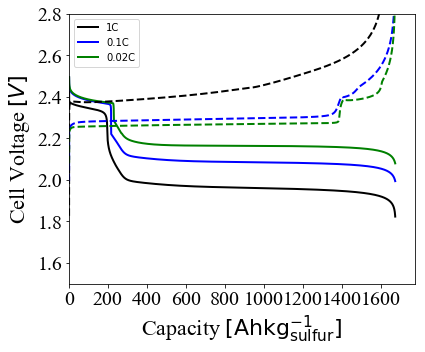

In [2]:
fig = plt.figure(1)
ax = fig.add_axes([0.2,0.2,0.6,0.75])
fig.set_size_inches((8.,5.0))

fs = 20
lw = 2.0

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
    
p1, = plt.plot(SV_d_1C.loc[:, 'Time'], SV_d_1C.iloc[:, cat.ptr['phi_ed']], 'k-', linewidth=lw)
p2, = plt.plot(SV_d_01C.loc[:, 'Time'], SV_d_01C.iloc[:, cat.ptr['phi_ed']], 'b-', linewidth=lw)
p3, = plt.plot(SV_d_002C.loc[:, 'Time'], SV_d_002C.iloc[:, cat.ptr['phi_ed']], 'g-', linewidth=lw)
p4, = plt.plot(SV_c_1C.loc[:, 'Time'], SV_c_1C.iloc[:, cat.ptr['phi_ed']], 'k--', linewidth=lw)
p5, = plt.plot(SV_c_01C.loc[:, 'Time'], SV_c_01C.iloc[:, cat.ptr['phi_ed']], 'b--', linewidth=lw)
p6, = plt.plot(SV_c_002C.loc[:, 'Time'], SV_c_002C.iloc[:, cat.ptr['phi_ed']], 'g--', linewidth=lw)
plt.xlim((0, 1775))
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
plt.ylim((1.5, 2.8))
plt.legend(['1C', '0.1C', '0.02C'])
#plt.yticks([])
plt.ylabel('Cell Voltage $[V]$',
           fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

## Plot volume fraction of end products at various C-rates

Text(0.5, 0, 'Capacity $[\\mathrm{A} \\mathrm{h} \\mathrm{kg}^{-1}_\\mathrm{sulfur}]$')

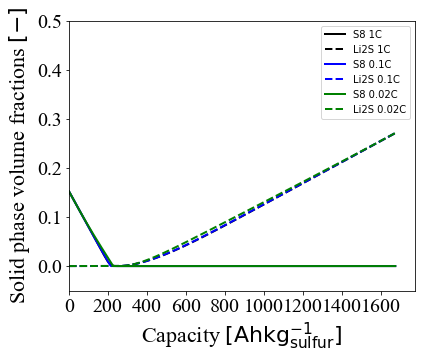

In [3]:
fig = plt.figure(2)
ax = fig.add_axes([0.2,0.2,0.6,0.75])
fig.set_size_inches((8.,5.0))

fs = 20
lw = 2.0

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
    
p1, = plt.plot(SV_d_1C.loc[:, 'Time'], SV_d_1C.iloc[:, cat.ptr['eps_S8']], 'k-', linewidth=lw)
p2, = plt.plot(SV_d_1C.loc[:, 'Time'], SV_d_1C.iloc[:, cat.ptr['eps_Li2S']], 'k--', linewidth=lw)
p3, = plt.plot(SV_d_01C.loc[:, 'Time'], SV_d_01C.iloc[:, cat.ptr['eps_S8']], 'b-', linewidth=lw)
p4, = plt.plot(SV_d_01C.loc[:, 'Time'], SV_d_01C.iloc[:, cat.ptr['eps_Li2S']], 'b--', linewidth=lw)
p5, = plt.plot(SV_d_002C.loc[:, 'Time'], SV_d_002C.iloc[:, cat.ptr['eps_S8']], 'g-', linewidth=lw)
p6, = plt.plot(SV_d_002C.loc[:, 'Time'], SV_d_002C.iloc[:, cat.ptr['eps_Li2S']], 'g--', linewidth=lw)
plt.xlim((0, 1775))
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
plt.ylim((-0.05, 0.5))
plt.legend(['S8 1C', 'Li2S 1C', 'S8 0.1C', 'Li2S 0.1C', 'S8 0.02C', 'Li2S 0.02C'])
plt.ylabel('Solid phase volume fractions $[-]$',
           fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

## Plotting polysulfide concentrations at 1C

Text(0.5, 0, 'Capacity $[\\mathrm{A} \\mathrm{h} \\mathrm{kg}^{-1}_\\mathrm{sulfur}]$')

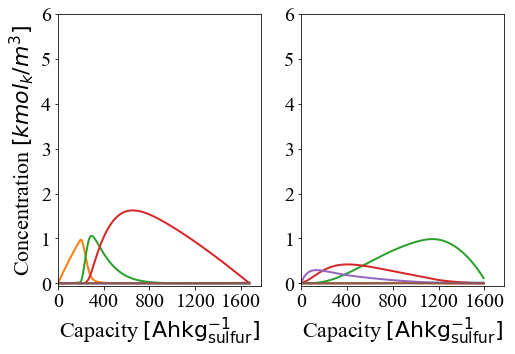

In [4]:
fig = plt.figure(3)
ax = fig.add_subplot(121)
fig.set_size_inches((8.,5.0))

fs = 20
lw = 2.0

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

# Pulls only tags for polysulfide species
rho_S = np.array([])
for i in np.arange(len(tags['rho_el'])):
    offset = floor(i/10)*10
    if cat.S_atoms_bool[i-offset]: #and cathode.n_S_atoms[i-offset] > 2:
        rho_S = np.append(rho_S, tags['rho_el'][i])     
 
for i in np.arange(len(rho_S)):
    p1, = plt.plot(SV_d_1C.loc[:, 'Time'], SV_d_1C.loc[:, rho_S[i]], linewidth=lw)

plt.xlim((0, 1775))
plt.xticks([0, 400, 800, 1200, 1600])
plt.ylim((-0.05, 6))
plt.ylabel('Concentration $[kmol_k/m^3]$',
           fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

ax2 = fig.add_subplot(122)

for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

for i in np.arange(len(rho_S)):
    p2, = plt.plot(SV_c_1C.loc[:, 'Time'], SV_c_1C.loc[:, rho_S[i]], linewidth=lw)

plt.xlim((0, 1775))
plt.xticks([0, 400, 800, 1200, 1600])
plt.ylim((-0.05, 6))
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

## Plotting polysulfide concentrations at 0.1C

Text(0.5, 0, 'Capacity $[\\mathrm{A} \\mathrm{h} \\mathrm{kg}^{-1}_\\mathrm{sulfur}]$')

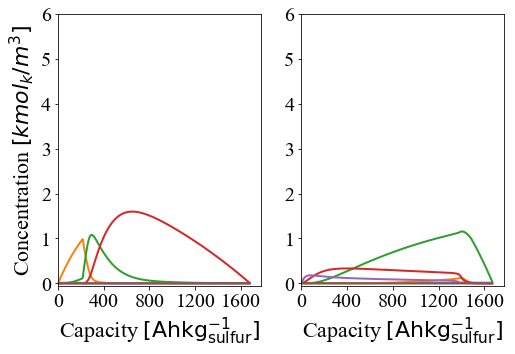

In [5]:
fig = plt.figure(4)
ax = fig.add_subplot(121)
fig.set_size_inches((8.,5.0))

fs = 20
lw = 2.0

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

# Pulls only tags for polysulfide species
rho_S = np.array([])
for i in np.arange(len(tags['rho_el'])):
    offset = floor(i/10)*10
    if cat.S_atoms_bool[i-offset]: #and cathode.n_S_atoms[i-offset] > 2:
        rho_S = np.append(rho_S, tags['rho_el'][i])     
 
for i in np.arange(len(rho_S)):
    p1, = plt.plot(SV_d_01C.loc[:, 'Time'], SV_d_01C.loc[:, rho_S[i]], linewidth=lw)

plt.xlim((0, 1775))
plt.xticks([0, 400, 800, 1200, 1600])
plt.ylim((-0.05, 6))
plt.ylabel('Concentration $[kmol_k/m^3]$',
           fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

ax2 = fig.add_subplot(122)

for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

for i in np.arange(len(rho_S)):
    p2, = plt.plot(SV_c_01C.loc[:, 'Time'], SV_c_01C.loc[:, rho_S[i]], linewidth=lw)

plt.xlim((0, 1775))
plt.xticks([0, 400, 800, 1200, 1600])
plt.ylim((-0.05, 6))
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

## Plotting polysulfide concentrations at 0.02C

Text(0.5, 0, 'Capacity $[\\mathrm{A} \\mathrm{h} \\mathrm{kg}^{-1}_\\mathrm{sulfur}]$')

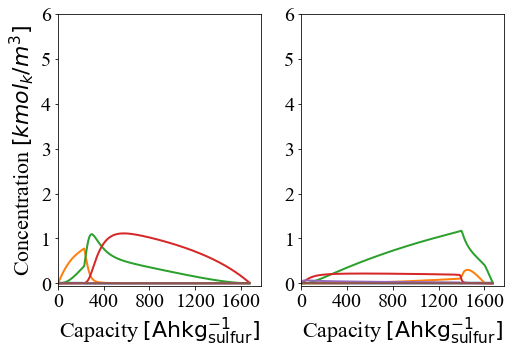

In [6]:
fig = plt.figure(5)
ax = fig.add_subplot(121)
fig.set_size_inches((8.,5.0))

fs = 20
lw = 2.0

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

# Pulls only tags for polysulfide species
rho_S = np.array([])
for i in np.arange(len(tags['rho_el'])):
    offset = floor(i/10)*10
    if cat.S_atoms_bool[i-offset]: #and cathode.n_S_atoms[i-offset] > 2:
        rho_S = np.append(rho_S, tags['rho_el'][i])     
 
for i in np.arange(len(rho_S)):
    p1, = plt.plot(SV_d_002C.loc[:, 'Time'], SV_d_002C.loc[:, rho_S[i]], linewidth=lw)

plt.xlim((0, 1775))
plt.xticks([0, 400, 800, 1200, 1600])
plt.ylim((-0.05, 6))
plt.ylabel('Concentration $[kmol_k/m^3]$',
           fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

ax2 = fig.add_subplot(122)

for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

for i in np.arange(len(rho_S)):
    p2, = plt.plot(SV_c_002C.loc[:, 'Time'], SV_c_002C.loc[:, rho_S[i]], linewidth=lw)

plt.xlim((0, 1775))
plt.xticks([0, 400, 800, 1200, 1600])
plt.ylim((-0.05, 6))
plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}_\mathrm{sulfur}]$', 
           fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)

## Plotting mean polysulfide concentrations (order >=4)

In [ ]:
def plot_meanPS(SV_df, tags, cycle):

#    C_k = SV_df[tags['rho_el'][cathode.i_S8:-2]].copy()
    meanPS = np.zeros([len(SV_df.index), inputs.npoints_cathode])
    for i in np.arange(inputs.npoints_cathode):
        for j in np.arange(len(SV_df.index)):
            offset = i*10
            C_k = SV_df[tags['rho_el'][5+offset:offset+8]].copy()
            meanPS[j, i] = sum(cat.n_S_atoms[5:-2]*C_k.iloc[j, :])/sum(cat.S_atoms_bool[5:-2]*C_k.iloc[j, :])
          
    "Set up your figure"
    fig = plt.figure(2)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    fig.set_size_inches((8.,5.0))
    
    "Formatting for the figure:"
    fs = 20     #font size for plots
    lw = 2.0    #line width for plots
#    font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs-1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')    
    
    for i in np.arange(inputs.npoints_cathode):
        p1, = plt.plot(SV_df.loc[:, 'Time'], meanPS[:, i], '-', linewidth=lw)
        plt.xlim((0, 1770))
        plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
        plt.yticks([2, 3, 4, 5, 6, 7, 8])
        plt.ylabel('Cell Voltage [V]', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        plt.xlabel(r'Capacity $[\mathrm{Ah} \hspace{0.5} \mathrm{kg}^{-1}_{\mathrm{sulfur}}]$', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        
    return

plot_meanPS(SV_d_1C, tags, 'Discharging')
plot_meanPS(SV_c_1C, tags, 'Charging')
plot_meanPS(SV_d_01C, tags, 'Discharging')
plot_meanPS(SV_c_01C, tags, 'Charging')
plot_meanPS(SV_d_002C, tags, 'Discharging')
plot_meanPS(SV_d_002C, tags, 'Charging')